# Initializing gpu-environment

In [19]:
import os

# surpress logging warnings (gets rid of annoying warnings whenever Tensorflow is used)
os.environ["GRPC_VERBOSITY"] = "ERROR"
os.environ["GLOG_minloglevel"] = "3"

# they are still shown the first time you run the code, so here is how to prevent that from happeneing
import logging
logging.getLogger('tensorflow').disabled = True

In [20]:
import tensorflow as tf

In [21]:
import pandas
import seaborn as sns


sns.set(style="whitegrid")

## Quickly create a model 

In [22]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
df.shape

(150, 5)

In [24]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X = df.drop(columns=["species"])
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
from tensorflow.keras.callbacks import Callback, EarlyStopping

class EpochLogger(Callback):
	def on_epoch_end(self, epoch, logs=None):
		if epoch % 10 == 0:
			# Epoch 10 - loss: 0.3593, accuracy: 0.9250
			print(f"Epoch {epoch}: loss: {logs['loss']:.4f}, accuracy: {logs['accuracy']:.4f}")

epoch_logger = EpochLogger()
early_stopping = EarlyStopping( patience=100,
								restore_best_weights=True,
								monitor="accuracy",
								verbose=1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


# 1. Architecture
def get_model():
	model = Sequential()

	model.add(Input(shape=(4,)))
	model.add(Dense(4, activation="relu"))
	model.add(Dense(6, activation="relu"))
	model.add(Dense(3, activation="softmax"))

	return model


# 2. Compile
model = get_model()

model.compile(
	optimizer="adam", 
	loss="categorical_crossentropy", 
	metrics=["accuracy"])


# 3. Fit
fit = model.fit(
	X_train,
	y_train,
	epochs=500,
	batch_size=1, callbacks=[epoch_logger, early_stopping],
	verbose=0)

Epoch 0: loss: 0.9300, accuracy: 0.3250
Epoch 10: loss: 0.6298, accuracy: 0.8167
Epoch 20: loss: 0.4795, accuracy: 0.8833
Epoch 30: loss: 0.3471, accuracy: 0.9417
Epoch 40: loss: 0.2505, accuracy: 0.9583
Epoch 50: loss: 0.1939, accuracy: 0.9583
Epoch 60: loss: 0.1470, accuracy: 0.9750
Epoch 70: loss: 0.1273, accuracy: 0.9667
Epoch 80: loss: 0.1195, accuracy: 0.9667
Epoch 90: loss: 0.1049, accuracy: 0.9583
Epoch 100: loss: 0.0848, accuracy: 0.9750
Epoch 110: loss: 0.0877, accuracy: 0.9750
Epoch 120: loss: 0.0900, accuracy: 0.9750
Epoch 130: loss: 0.0808, accuracy: 0.9667
Epoch 140: loss: 0.0792, accuracy: 0.9833
Epoch 150: loss: 0.0611, accuracy: 0.9917
Epoch 160: loss: 0.0732, accuracy: 0.9833
Epoch 170: loss: 0.0666, accuracy: 0.9750
Epoch 180: loss: 0.0770, accuracy: 0.9667
Epoch 190: loss: 0.0722, accuracy: 0.9667
Epoch 200: loss: 0.0702, accuracy: 0.9750
Epoch 210: loss: 0.0722, accuracy: 0.9750
Epoch 220: loss: 0.0773, accuracy: 0.9750
Epoch 230: loss: 0.0709, accuracy: 0.9667
Epo

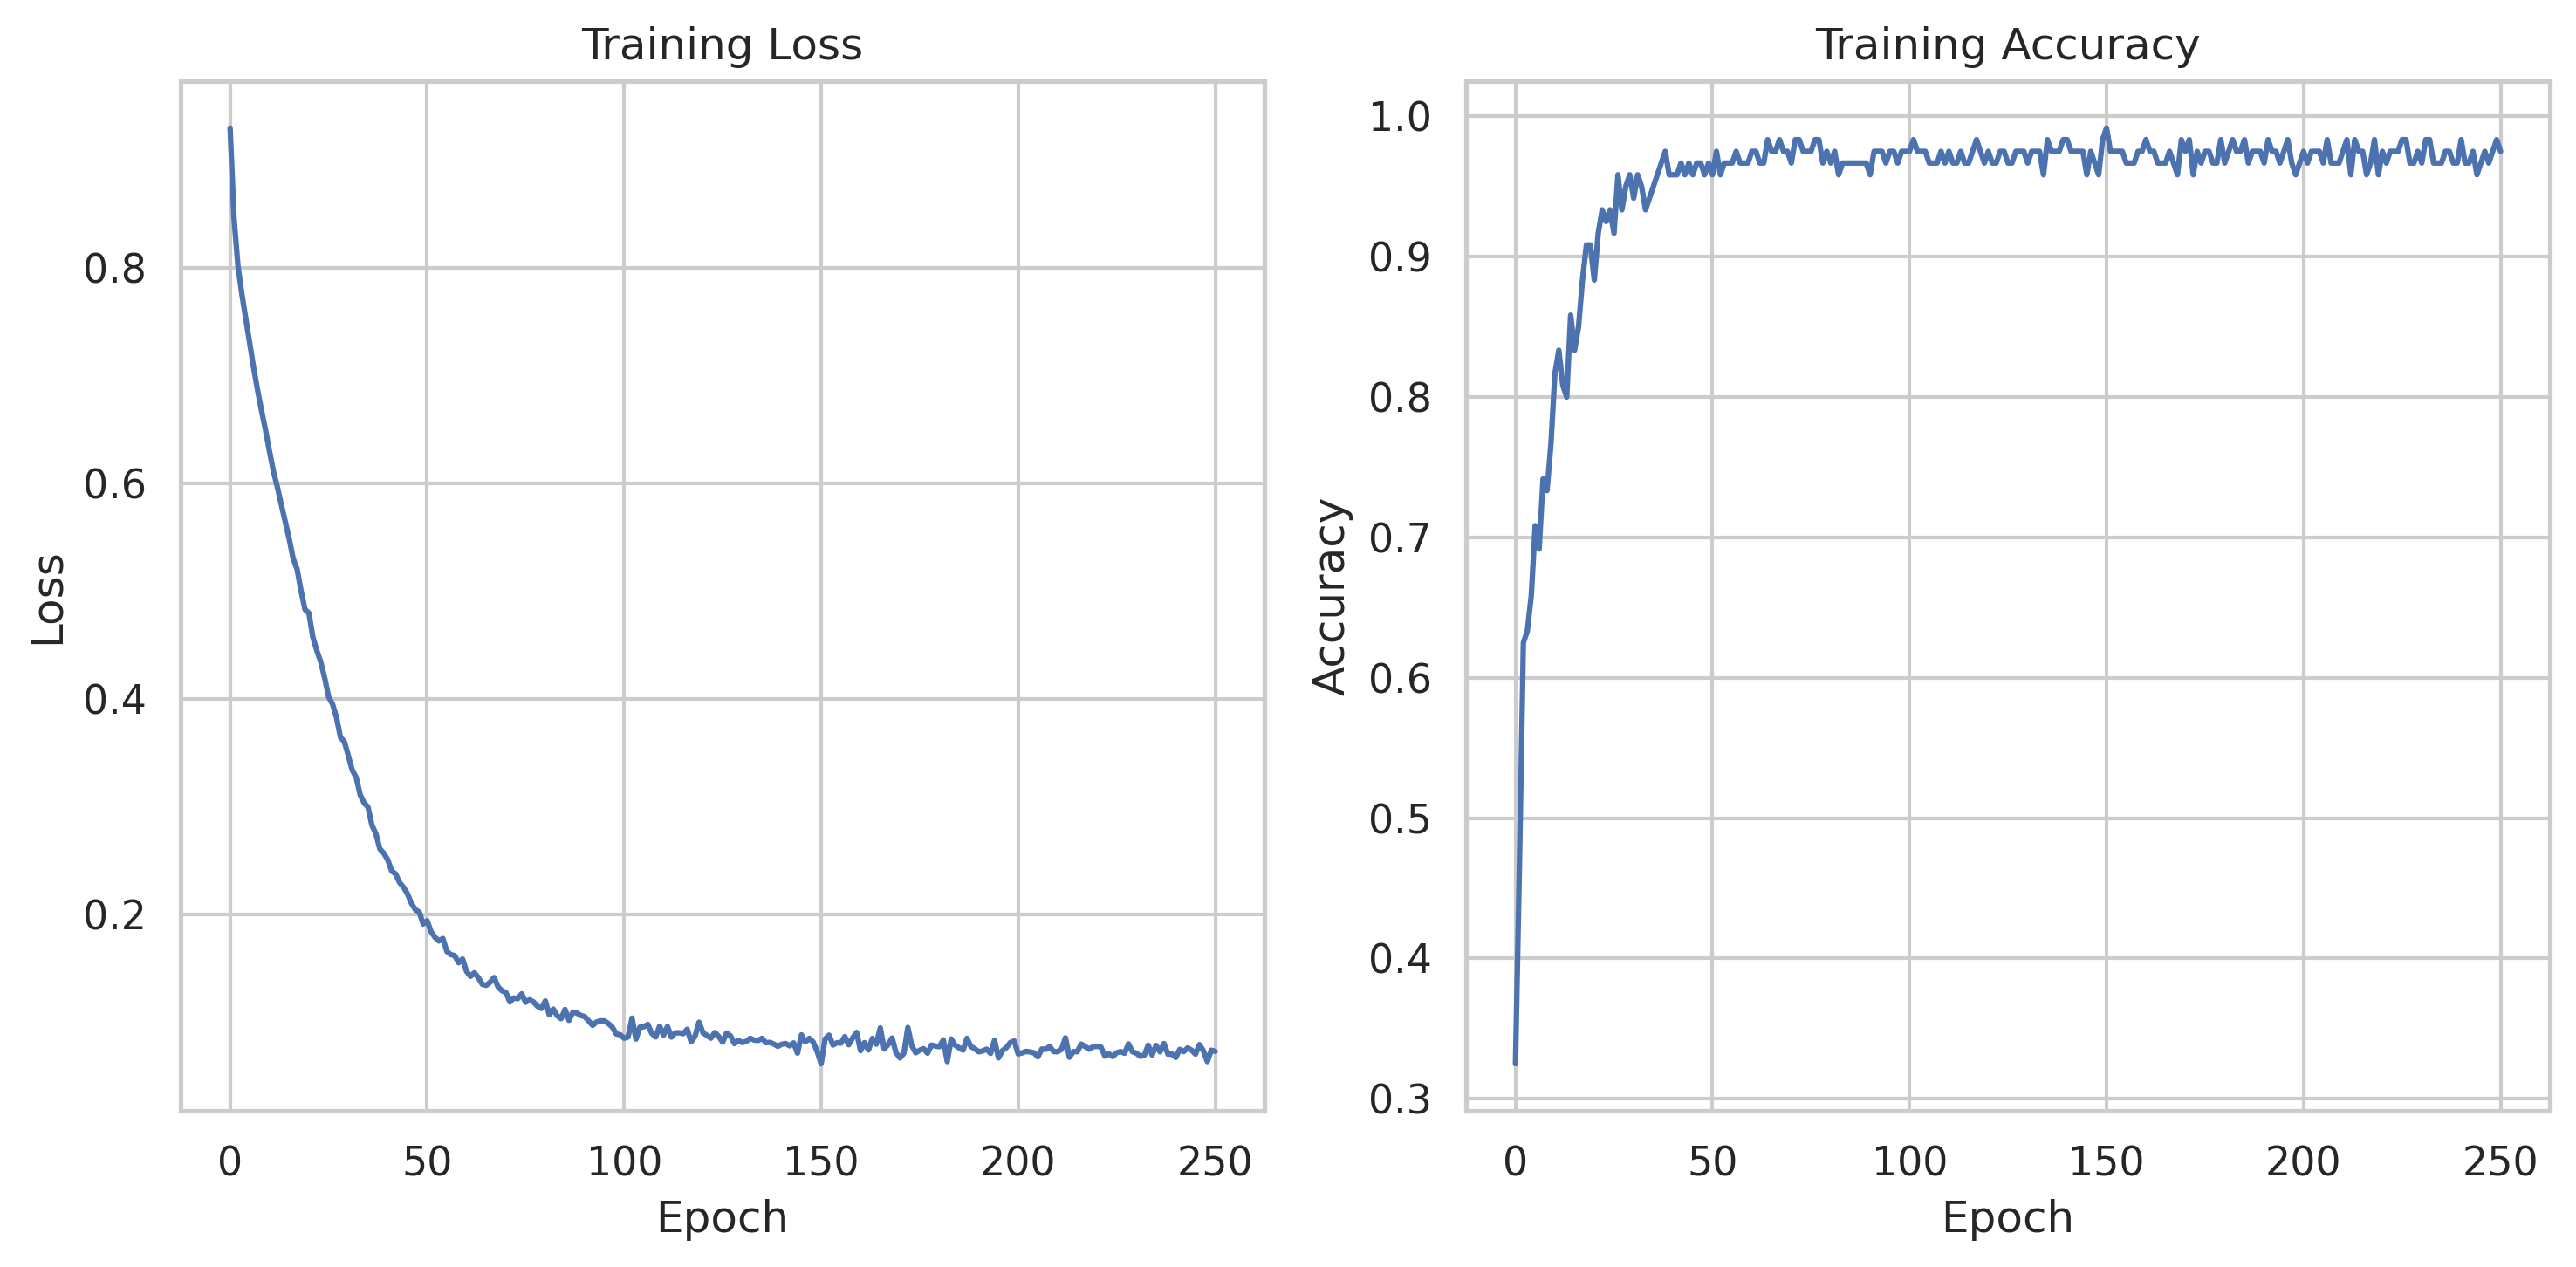

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=300)


plt.subplot(1, 2, 1)
plt.plot(fit.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")

plt.subplot(1, 2, 2)
plt.plot(fit.history["accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")


plt.tight_layout()